# `ImageHandler` Documentation

#### Author: Mahdi Shadkam-Farrokhi: [GitHub](https://github.com/Shaddyjr) | [Medium](https://medium.com/@mahdis.pw) | [LinkedIn](https://www.linkedin.com/in/mahdi-shadkam-farrokhi-m-s-8a410958/) | [mahdis.pw](http://mahdis.pw)

## Contents
- [Purpose](#Purpose)
- [Loading example data](#Loading-example-data)
- [Instantiation](#Instantiation)
- [.images](#.images)
- [.images_for_display](#.images_for_display)
- [.resize()](#.resize())
- [.normalize()](#.normalize())
- [.grayscale()](#.grayscale())
- [.invert()](#.invert())
- [.rotate()](#.rotate())
- [Method Chaining](#Method-Chaining)
- [.transform()](#.transform())
- [.get_by_index()](#.get_by_index())

## Purpose
Single image transformations are manageable, but introducing compounded transformations quickly gets out of hand. 

The `ImageHandler` class was created as a simple tool to aid in storing, transforming, and visualizing N-dimensional `numpy.array`-like images.  The `ImageHandler` object abstracts and simplifies this process, all while maintaining faithful tracking of indeces.

_NOTE: Transformations do not alter the original data object. A copy is returned after one or more transformations take place. Transformations are chainable._

## Loading example data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio
from image_handler import ImageHandler

In [2]:
data = pd.read_csv('./data/bee_data.csv', nrows = 10, usecols = [0])

In [3]:
data.head()

,file
0,041_066.png
1,041_072.png
2,041_073.png
3,041_067.png
4,041_059.png


In [4]:
def get_image_data(files):
    IMAGE_FILE_ROOT = './data/bee_imgs/' 
    return np.asanyarray([imageio.imread("{}{}".format(IMAGE_FILE_ROOT, file)) for file in files])

In [5]:
raw_images = get_image_data(data["file"].values)

In [6]:
def show_image(image, ax = plt, title = None, cmap = None):
    if type(image) == list:
        n = len(image)
        cols = 4
        f, axes = plt.subplots(nrows=int(np.ceil(n/cols)),ncols=cols, figsize=(14,8))
        axes = axes.flatten()
        for i in range(n):
            axes[i].imshow(image[i], cmap = cmap)
    else:
        ax.imshow(image, cmap = cmap)
        ax.tick_params(bottom = False, left = False, labelbottom = False, labelleft = False)

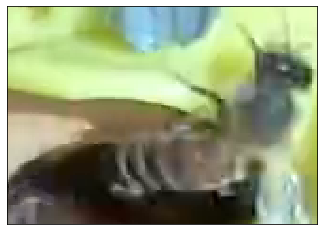

In [7]:
show_image(raw_images[0])

## Instantiation
Instantiate with a list or `numpy.array` of N-dimensional `numpy.array`-like images.

In [8]:
img_store = ImageHandler(raw_images)

## .images
The `.images` property contains the stored images for user access.

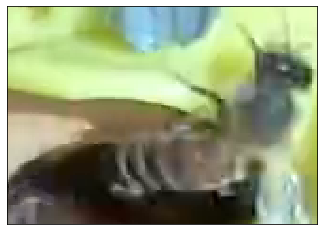

In [9]:
show_image(img_store.images[0])

## .index
The `.index` property contains the associated image indeces.

In [10]:
img_store.index

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## .images_for_display

Given different formatting issues, such as normalization, some transformations will cause images to be distorted. 
Instead of accessing `.images` for visualization, the `.images_for_display` returns the same images, but transformed back into a displayable format.

Use `.images_for_display` if you intend to visualize images.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


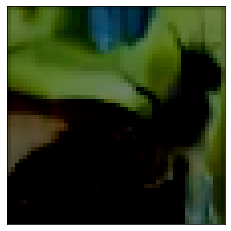

In [11]:
resized_and_normalized = img_store.resize((54,54)).normalize()
show_image(resized_and_normalized.images[0])

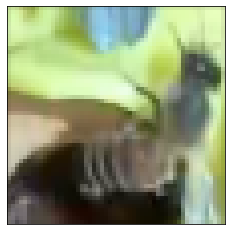

In [12]:
show_image(resized_and_normalized.images_for_display[0])

## .resize()

The `.resize()` method takes a single argument `resizing`, which takes a tuple of 2 integers representing the resized `(width, height)`

Typically, `.resize()` is the first transformation to use when standardizing image data.

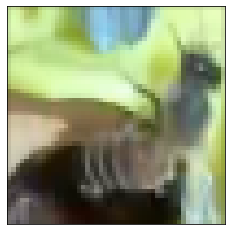

In [13]:
resizing = (50, 50)
resized = img_store.resize(resizing)
show_image(resized.images_for_display[0])

## .normalize()

This method is used simply to rescale the image data from (0,255) to (-0.5,0.5), which is found to work best with convolutional neural networks. This tranformation makes it impossible to visualize the data, however. Use `.images_for_display` to show the original scaled image data.

In [14]:
resized_and_normalized = img_store.resize((54,54)).normalize()

## .grayscale()

Converts the image data to grayscale.

_NOTE: the alpha channel is reduced to 1-dim_

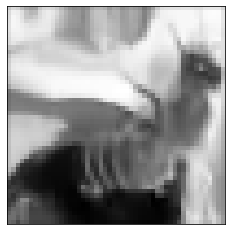

In [15]:
gray = img_store.resize((50,50)).grayscale()
show_image(gray.images_for_display[0], cmap = "gray")

In [16]:
gray.images.shape # 10 images, 50x50, with 1 alpha channel

(10, 50, 50, 1)

## .invert()

Inverts image colors.

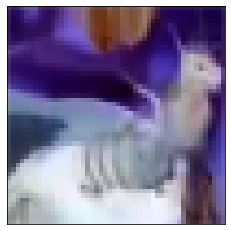

In [17]:
inverted = img_store.resize((50,50)).invert()
show_image(inverted.images_for_display[0])

## .rotate()

Returns an `ImageHandler` with each image rotated 0, 90, 180, and 270 degrees along with each of those images mirrored. Therefor, this tranformation returns n * 8 images, where n = number of original images stored.

_NOTE: The returned images are not in the same order as the original. Use `.index` to discern image order._

In [18]:
rotated = img_store.resize((50,50)).rotate()

In [19]:
rotated.images.shape # (10 original images) * 8 = 80 images returned

(80, 50, 50, 3)

In [20]:
rotated.index # order not continuous, but discernable

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3,
       4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 0, 1, 2, 3,
       4, 5, 6, 7, 8, 9, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5,
       5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9])

In [21]:
desired_image_index = 0
index_mask = [i for i, index in enumerate(rotated.index) if index == desired_image_index]
desired_images = rotated.images_for_display[index_mask] # retreiving desired images

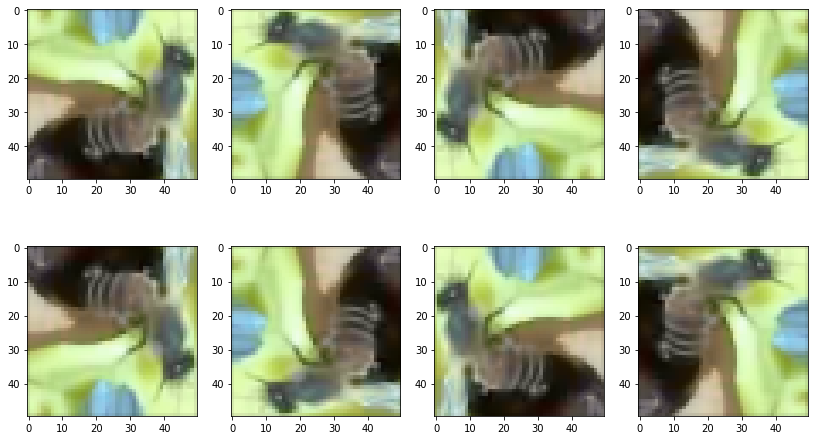

In [22]:
show_image(list(desired_images))

## Method Chaining
Methods are chainable for convenience.

In [23]:
resized_rotated_inverted_gray = img_store.resize((50,50)).rotate().invert().grayscale()

desired_image_index = 0
index_mask = [i for i, index in enumerate(resized_rotated_inverted_gray.index) if index == desired_image_index]
desired_images = resized_rotated_inverted_gray.images_for_display[index_mask] # retreiving desired images

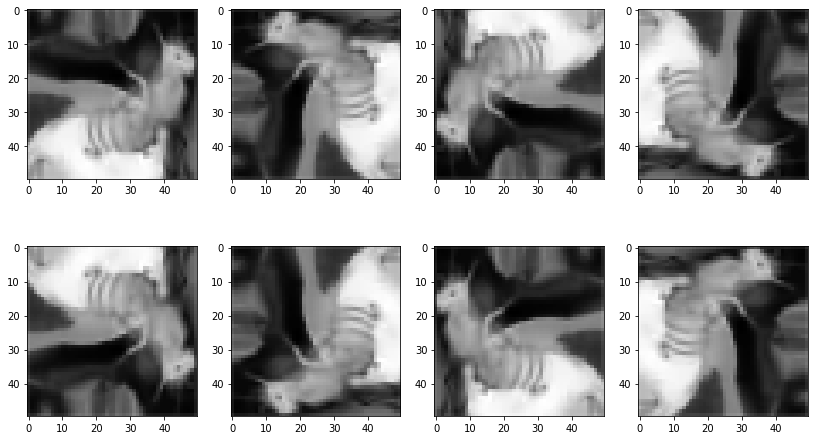

In [24]:
show_image(list(desired_images), cmap = "gray")

## .transform()
For simplification, `.transform()` combines all desired transformations in a single method call.

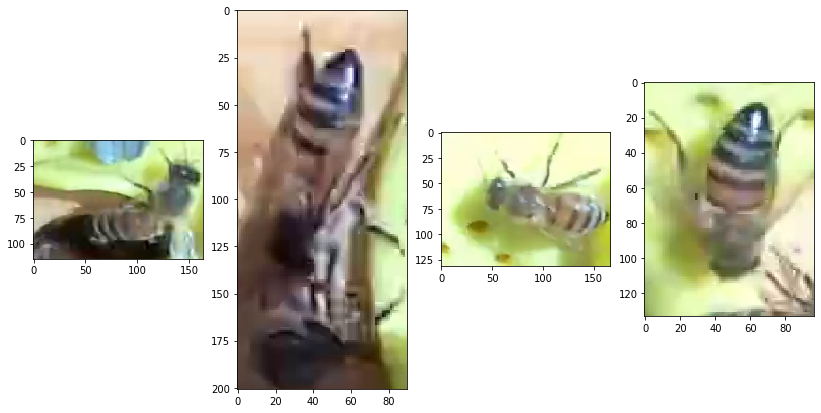

In [25]:
show_image(list(img_store.images_for_display[:4]))

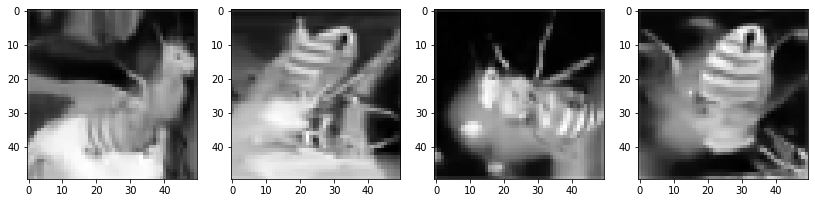

In [26]:
resize_invert_grayscale = img_store.transform(resize = (50,50), invert = True, grayscale = True)
show_image(list(resize_invert_grayscale.images_for_display[:4]), cmap = "gray")

## .get_by_index()

The `.get_by_index()` method takes a list if indeces and teturns an `ImageHandler` of the subset of images.

In [27]:
subset = [4,8]
sub_img_store = img_store.get_by_index(subset)

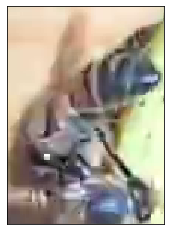

In [28]:
show_image(sub_img_store.images_for_display[0])